### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
print("1.0: Initializing Imports")
print("-"*30)

# --- Data Handling & Numerical ---
import pandas as pd
import numpy as np
from collections import Counter
from scipy.stats import norm
from scipy.spatial.distance import cdist

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Machine Learning & Statistical Modeling ---
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Natural Language Processing (NLP) ---
from wordcloud import WordCloud
from textblob import TextBlob

# --- Notebook Settings ---
import warnings
warnings.filterwarnings('ignore')
# Set a default figure size for all plots
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.titlesize'] = 20 # NEW
plt.rcParams['figure.titleweight'] = 'bold' # NEW

print("All libraries imported successfully.")

1.0: Initializing Imports
------------------------------
All libraries imported successfully.


In [2]:
# 1.1 : Data Loading
print("1.1: Data Loading and Initial View")
print("-"*30)

# Load the CSV file(s) as reviews.
# The notebook is in the 'Python' directory, so we navigate up one level ('../') to get to the root and then into 'Data/'.
file_path = '../Data/turtle_reviews.csv'
rdf = pd.read_csv(file_path)

# View the DataFrame.
print("DataFrame Head:")
rdf.head()

1.1: Data Loading and Initial View
------------------------------
DataFrame Head:


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# 1.2: Any missing values?
print("1.2: Checking for Missing Values")
print("-"*30)
print("Count of missing values per column:")
print(rdf.isnull().sum())

1.2: Checking for Missing Values
------------------------------
Count of missing values per column:
gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [4]:
# 1.3: EDA
print("1.4: DataFrame Structure and Info")
print("-"*30)
print("DataFrame Info:")
rdf.info()

1.4: DataFrame Structure and Info
------------------------------
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# 1.4: Further Data Quality Assessment
print("1.4: Further Data Quality Assessments")
print("-"*30)

# Check for duplicate rows
duplicate_rows = rdf.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Check the number of unique values in each column
print("Number of unique values per column:")
print(rdf.nunique())

1.4: Further Data Quality Assessments
------------------------------
Number of duplicate rows: 0
Number of unique values per column:
gender                       2
age                         45
remuneration (k£)           64
spending_score (1-100)      84
loyalty_points             627
education                    5
language                     1
platform                     1
product                    200
review                    1980
summary                   1432
dtype: int64


In [6]:
#1.5: Basic descriptive statistics
print("1.5: Descriptive Statistics for Numerical Columns")
print("-"*30)

# This provides statistics for numerical columns only
rdf.describe()

1.5: Descriptive Statistics for Numerical Columns
------------------------------


,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


1.4: Further Data Quality Assessments
------------------------------
Descriptive Statistics for All Columns:


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
count,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000,2000
unique,2,NaN,NaN,NaN,NaN,5,1,1,NaN,1980,1432
top,Female,NaN,NaN,NaN,NaN,graduate,EN,Web,NaN,love it,Five Stars
freq,1120,NaN,NaN,NaN,NaN,900,2000,2000,NaN,5,378
mean,NaN,39.495000,48.079060,50.000000,1578.032000,NaN,NaN,NaN,4320.521500,NaN,NaN
std,NaN,13.573212,23.123984,26.094702,1283.239705,NaN,NaN,NaN,3148.938839,NaN,NaN
min,NaN,17.000000,12.300000,1.000000,25.000000,NaN,NaN,NaN,107.000000,NaN,NaN
25%,NaN,29.000000,30.340000,32.000000,772.000000,NaN,NaN,NaN,1589.250000,NaN,NaN
50%,NaN,38.000000,47.150000,50.000000,1276.000000,NaN,NaN,NaN,3624.000000,NaN,NaN
75%,NaN,49.000000,63.960000,73.000000,1751.250000,NaN,NaN,NaN,6654.000000,NaN,NaN



Distribution of Spending Score:


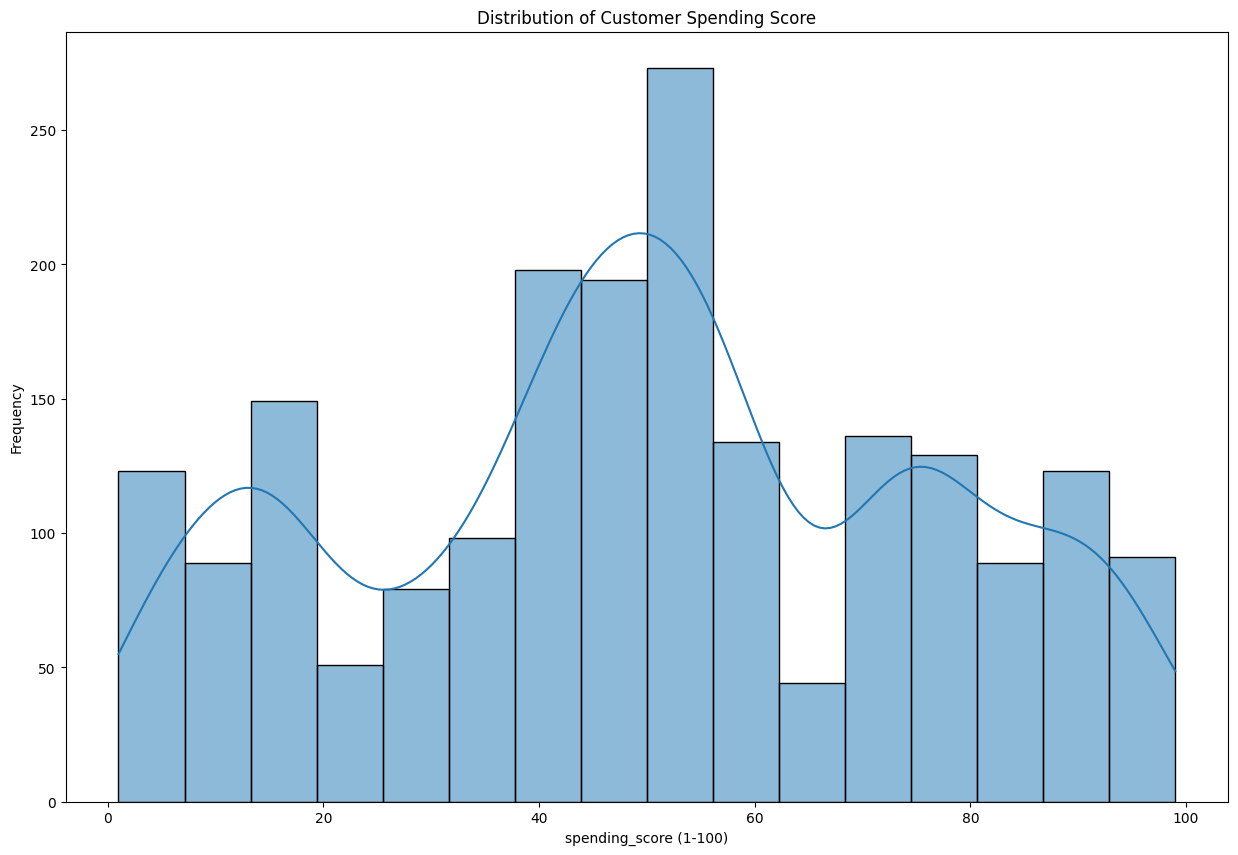


Correlation Matrix of Numerical Variables:


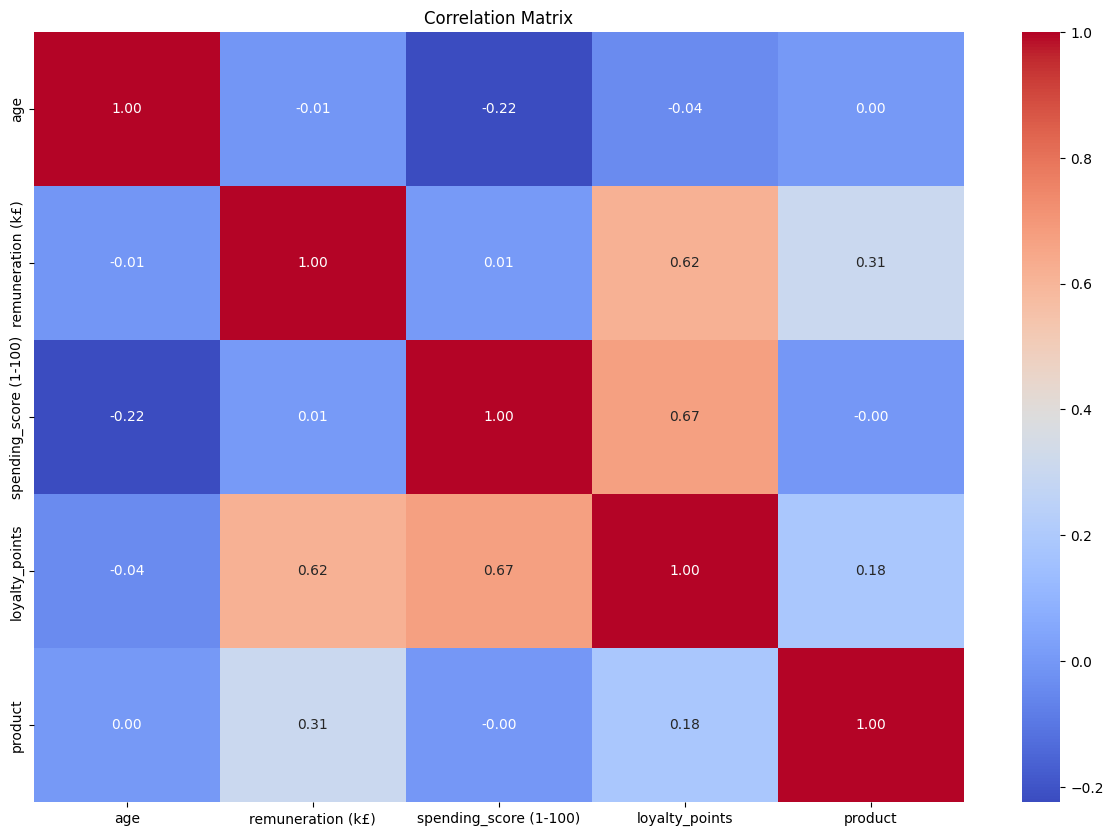

In [7]:
# 1.4: Further Data Quality Assessment
print("1.4: Further Data Quality Assessments")
print("-"*30)

print("Descriptive Statistics for All Columns:")
display(rdf.describe(include='all'))

# Visualize the distribution of a key numerical variable
print("\nDistribution of Spending Score:")
sns.histplot(rdf['spending_score (1-100)'], kde=True)
plt.title('Distribution of Customer Spending Score')
plt.xlabel('spending_score (1-100)')
plt.ylabel('Frequency')
plt.show()

# Create a correlation matrix heatmap
print("\nCorrelation Matrix of Numerical Variables:")

# Select only numeric columns for correlation calculation
numeric_cols = rdf.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 2. Drop columns

In [8]:
# 2.0: Drop unnecessary columns.
print("2.0: Dropping unnecessary columns")
print("-"*30)

# Storing a rdf.copy() separately ensure we can run this cell multiple times
rdfold = rdf.copy()
rdf2= rdfold.drop(['language', 'platform'], axis=1)

# View column names.
print("Available columns:")
display(rdf2.head(1)) # print(rdf2.df.columns.tolist()) also works but display() looks nicer

2.0: Dropping unnecessary columns
------------------------------
Available columns:


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.3,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...


## 3. Rename columns

In [9]:
# 3.0 Renaming columns
print("3.0: Renaming columns")
print("-"*30)

# Define column name Dictionary (lowerCamelCase format)
columns = {
    'remuneration (k£)' : 'income', 
    'loyalty_points' : 'loyaltyPoints',
    'spending_score (1-100)' : 'spendingScore', 
}

# Rename the column headers.
rdf3 = rdf2.rename(columns=columns) # Genius variable naming here

# View column names.
print("Renamed columns:")
display(rdf3.head(1)) # Again, I prefer this method for aesthetic reasons

3.0: Renaming columns
------------------------------
Renamed columns:


,gender,age,income,spendingScore,loyaltyPoints,education,product,review,summary
0,Male,18,12.3,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...


## 4. Save the DataFrame as a CSV file

I don't really see the utility for this, but in the interest of adhering to assignment guidelines, here it is.

In [10]:
# 4.0: Create a CSV file as output.
print("4.0: Exporting the new DataFrame to .csv")
print("-"*30)
rdf3.to_csv('../Data/turtle_reviews_2.csv', index=False)
print("Export completed successfully!")

4.0: Exporting the new DataFrame to .csv
------------------------------
Export completed successfully!


In [11]:
# 4.1: Import new CSV file with Pandas.
print("4.1: Import and inspect the exported DataFrame")
print("-"*30)

# Import 
rdf4 = pd.read_csv('../Data/turtle_reviews_2.csv')

# View DataFrame.
display(rdf4)

4.1: Import and inspect the exported DataFrame
------------------------------


,gender,age,income,spendingScore,loyaltyPoints,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 5. Linear regression

In [12]:
# 5.0: Copying the previous rdf DataFrame
print("5.0: Copying rdf4 to a new variable rdf5")
print("-"*30)
rdf5 = rdf4.copy()
print("Copy completed successfully!")

5.0: Copying rdf4 to a new variable rdf5
------------------------------
Copy completed successfully!


### 5a) spending vs loyalty

In [13]:
# 5a.1: Define independent and dependent variables
print("5a.1: Defining variables (spending vs loyalty)")
print("-"*30)

# Define the dependent variable (Y)
y = rdf3['loyaltyPoints']

# Define the independent variable (X) and add a constant for the intercept
X_spending = sm.add_constant(rdf3['spendingScore'])

print("Independent variable (X): spendingScore")
print("Dependent variable (y): loyaltyPoints")

5a.1: Defining variables (spending vs loyalty)
------------------------------
Independent variable (X): spendingScore
Dependent variable (y): loyaltyPoints


In [14]:
# 5a.2: Create and summarize the OLS model
print("5a.2: Creating OLS model and summarizing metrics")
print("-"*30)

# Create the OLS model
model_spending = sm.OLS(y, X_spending)
# Fit the model to the data
results_spending = model_spending.fit()

# Print the comprehensive summary of the regression results
print(results_spending.summary())

5a.2: Creating OLS model and summarizing metrics
------------------------------
                            OLS Regression Results                            
Dep. Variable:          loyaltyPoints   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 19 Sep 2025   Prob (F-statistic):          2.92e-263
Time:                        15:02:39   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [15]:
# 5a.3: Extract model parameters
print("5a.3: Extracting estimated parameters and predictions")
print("-"*30)

# Extract the estimated parameters (coefficients)
params_spending = results_spending.params
print("Estimated Parameters (Coefficients):\n", params_spending)

# Extract the standard errors
bse_spending = results_spending.bse
print("\nStandard Errors:\n", bse_spending)

# Extract the predicted values
predicted_values_spending = pd.DataFrame(results_spending.predict())
print("\nFirst 5 Predicted Values:\n", predicted_values_spending.head(5))

5a.3: Extracting estimated parameters and predictions
------------------------------
Estimated Parameters (Coefficients):
 const           -75.052663
spendingScore    33.061693
dtype: float64

Standard Errors:
 const            45.930554
spendingScore     0.814419
dtype: float64

First 5 Predicted Values:
              0
0  1214.353374
1  2602.944491
2   123.317497
3  2470.697718
4  1247.415067


In [16]:
# 5a.4: Generate the regression table
print("5a.4: Generating the regression table")
print("-"*30)
# Create a DataFrame to display the key regression results neatly
regression_table_spending = pd.DataFrame({
    'Coefficient': params_spending,
    'Standard Error': bse_spending,
    'P-value': results_spending.pvalues
})
print("Simplified Regression Table:")
display(regression_table_spending)

5a.4: Generating the regression table
------------------------------
Simplified Regression Table:


,Coefficient,Standard Error,P-value
const,-75.052663,45.930554,1.024066e-01
spendingScore,33.061693,0.814419,2.916295e-263


5a.5: Plotting the regression line
------------------------------


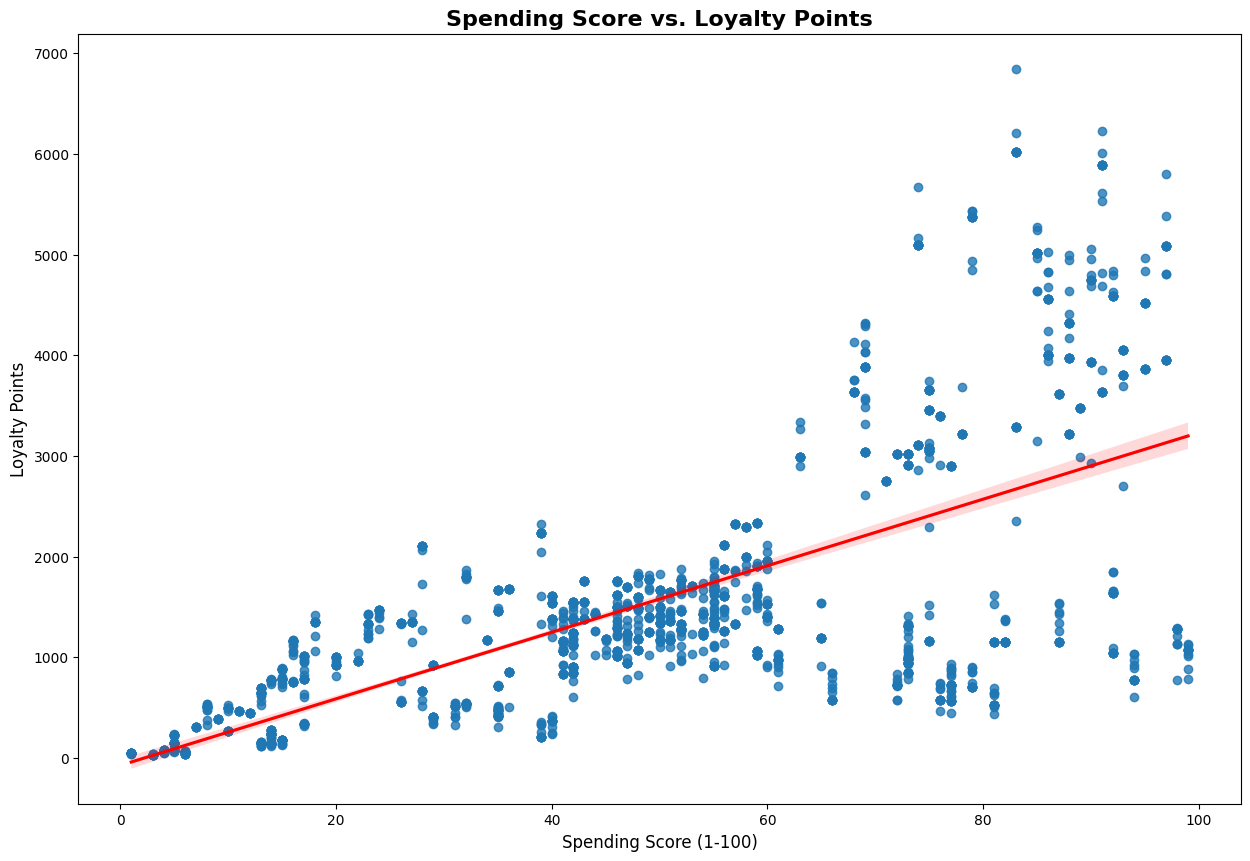

In [17]:
# 5a.5: Plot the linear regression
print("5a.5: Plotting the regression line")
print("-"*30)

# Use seaborn's regplot for a clean scatter plot with a fitted regression line
sns.regplot(x='spendingScore', y='loyaltyPoints', data=rdf5,
            line_kws={"color": "red"}) # Customizing line color for visibility
plt.title('Spending Score vs. Loyalty Points', fontsize=16, fontweight = 'bold')
plt.xlabel('Spending Score (1-100)', fontsize=12)
plt.ylabel('Loyalty Points', fontsize=12)
plt.show()

### 5b) renumeration vs loyalty

In [18]:
# 5b.1: Define independent and dependent variables
print("5b.1: Defining variables (income vs loyalty)")
print("-"*30)
# The dependent variable y is the same ('loyaltyPoints')
# Define the new independent variable (X) and add a constant
X_income = sm.add_constant(rdf3['income'])

print("Independent variable (X): income")
print("Dependent variable (y): loyaltyPoints")

5b.1: Defining variables (income vs loyalty)
------------------------------
Independent variable (X): income
Dependent variable (y): loyaltyPoints


In [19]:
# 5b.2: Create and summarize the OLS model
print("5b.2: Creating OLS model and summarizing metrics")
print("-"*30)
# Create the OLS model
model_income = sm.OLS(y, X_income)
# Fit the model
results_income = model_income.fit()

# Print the summary of the regression results
print(results_income.summary())

5b.2: Creating OLS model and summarizing metrics
------------------------------
                            OLS Regression Results                            
Dep. Variable:          loyaltyPoints   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 19 Sep 2025   Prob (F-statistic):          2.43e-209
Time:                        15:02:39   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [20]:
# 5b.3: Extract model parameters
print("5b.3: Extracting estimated parameters and predictions")
print("-"*30)
# Extract the estimated parameters (coefficients)
params_income = results_income.params
print("Estimated Parameters (Coefficients):\n", params_income)

# Extract the standard errors
bse_income = results_income.bse
print("\nStandard Errors:\n", bse_income)

# Extract the predicted values
predicted_values_income = pd.DataFrame(results_income.predict())
print("\nFirst 5 Predicted Values:\n", predicted_values_income.head())

5b.3: Extracting estimated parameters and predictions
------------------------------
Estimated Parameters (Coefficients):
 const    -65.686513
income    34.187825
dtype: float64

Standard Errors:
 const     52.170717
income     0.977925
dtype: float64

First 5 Predicted Values:
             0
0  354.823741
1  354.823741
2  382.857758
3  382.857758
4  410.891774


In [21]:
# 5b.4: Generate the regression table
print("5b.4: Generating the regression table")
print("-"*30)
# Create a DataFrame to display the key regression results
regression_table_income = pd.DataFrame({
    'Coefficient': params_income,
    'Standard Error': bse_income,
    'P-value': results_income.pvalues
})
print("Simplified Regression Table:")
display(regression_table_income)

5b.4: Generating the regression table
------------------------------
Simplified Regression Table:


,Coefficient,Standard Error,P-value
const,-65.686513,52.170717,2.081526e-01
income,34.187825,0.977925,2.430175e-209


5b.5: Plotting the regression line
------------------------------


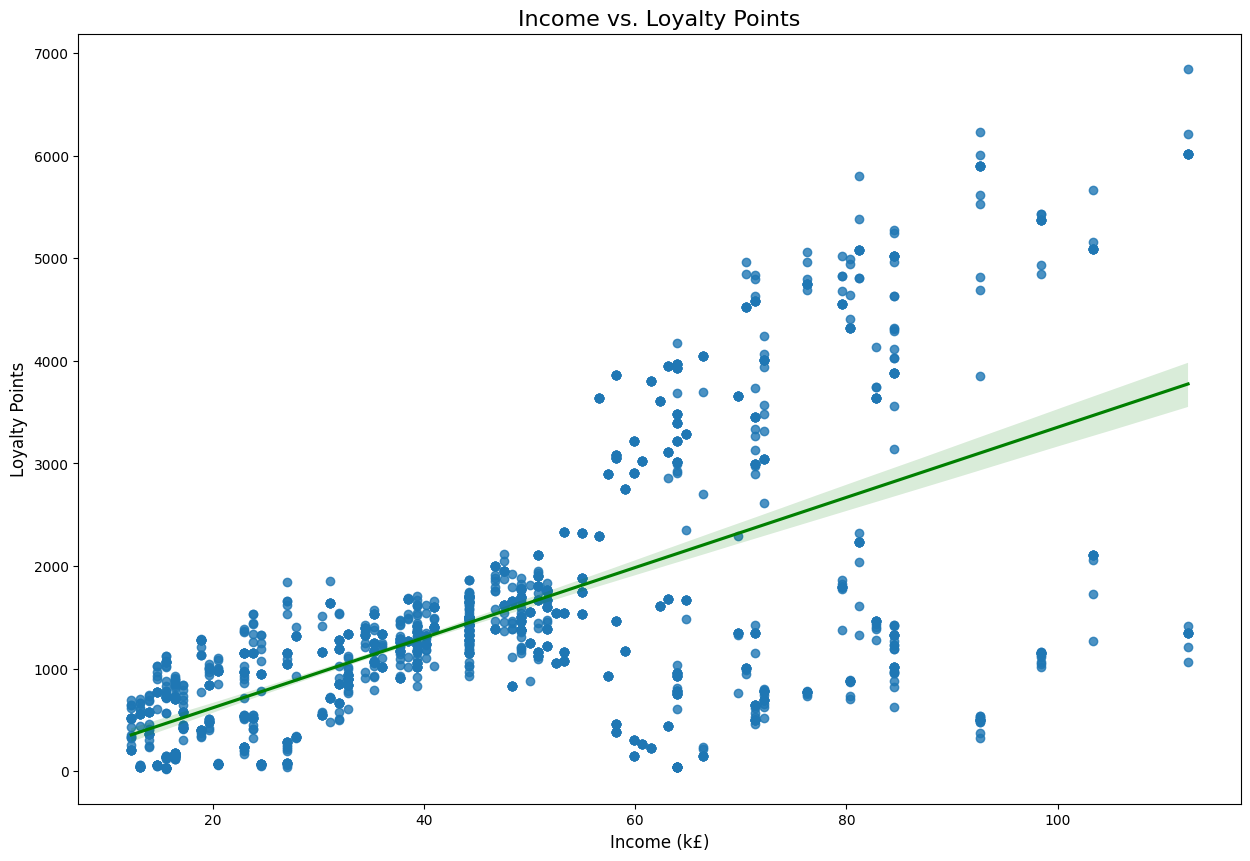

In [22]:
# 5b.5: Plot the linear regression
print("5b.5: Plotting the regression line")
print("-"*30)
# Use seaborn's regplot to visualize the relationship
sns.regplot(x='income', y='loyaltyPoints', data=rdf3,
            line_kws={"color": "green"})
plt.title('Income vs. Loyalty Points', fontsize=16)
plt.xlabel('Income (k£)', fontsize=12)
plt.ylabel('Loyalty Points', fontsize=12)
plt.show()

### 5c) age vs loyalty

In [23]:
# 5c.1: Define independent and dependent variables
print("5c.1: Defining variables (age vs loyalty)")
print("-"*30)
# The dependent variable y is still 'loyaltyPoints'
# Define the new independent variable (X) and add a constant
X_age = sm.add_constant(rdf3['age'])

print("Independent variable (X): age")
print("Dependent variable (y): loyaltyPoints")

5c.1: Defining variables (age vs loyalty)
------------------------------
Independent variable (X): age
Dependent variable (y): loyaltyPoints


In [24]:
# 5c.2: Create and summarize the OLS model
print("5c.2: Creating OLS model and summarizing metrics")
print("-"*30)
# Create the OLS model
model_age = sm.OLS(y, X_age)
# Fit the model
results_age = model_age.fit()

# Print the summary of the regression results
print(results_age.summary())

5c.2: Creating OLS model and summarizing metrics
------------------------------
                            OLS Regression Results                            
Dep. Variable:          loyaltyPoints   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 19 Sep 2025   Prob (F-statistic):             0.0577
Time:                        15:02:40   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [25]:
# 5c.3: Extract model parameters
print("5c.3: Extracting estimated parameters and predictions")
print("-"*30)
# Extract the estimated parameters (coefficients)
params_age = results_age.params
print("Estimated Parameters (Coefficients):\n", params_age)

# Extract the standard errors
bse_age = results_age.bse
print("\nStandard Errors:\n", bse_age)

# Extract the predicted values
predicted_values_age = pd.DataFrame(results_age.predict())
print("\nFirst 5 Predicted Values:\n", predicted_values_age.head())

5c.3: Extracting estimated parameters and predictions
------------------------------
Estimated Parameters (Coefficients):
 const    1736.517739
age        -4.012805
dtype: float64

Standard Errors:
 const    88.248731
age       2.113177
dtype: float64

First 5 Predicted Values:
              0
0  1664.287247
1  1644.223221
2  1648.236026
3  1636.197611
4  1604.095169


In [26]:
# 5c.4: Generate the regression table
print("5c.4: Generating the regression table")
print("-"*30)
# Create a DataFrame to display the key regression results
regression_table_age = pd.DataFrame({
    'Coefficient': params_age,
    'Standard Error': bse_age,
    'P-value': results_age.pvalues
})
print("Simplified Regression Table:")
display(regression_table_age)

5c.4: Generating the regression table
------------------------------
Simplified Regression Table:


,Coefficient,Standard Error,P-value
const,1736.517739,88.248731,6.192703e-79
age,-4.012805,2.113177,5.771573e-02


5c.5: Plotting the regression line
------------------------------


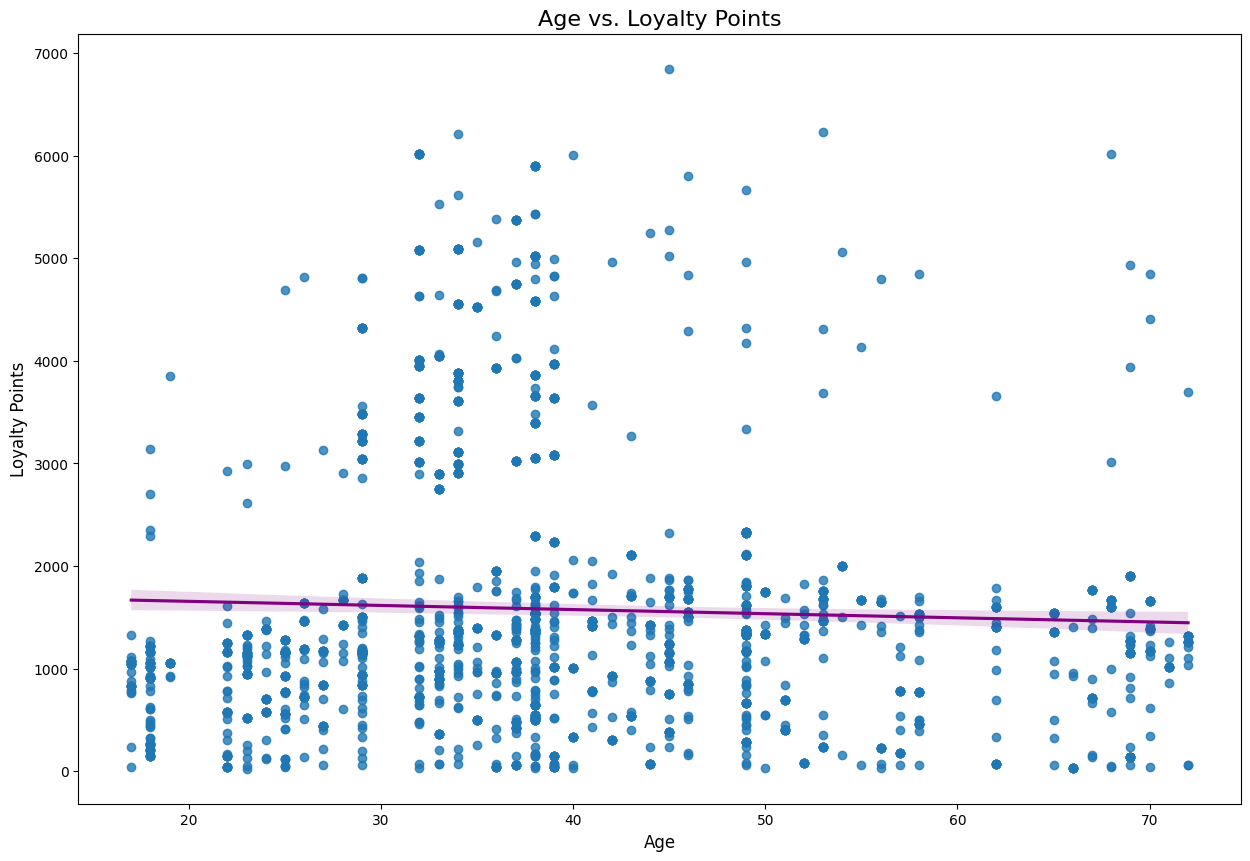

In [27]:
# 5c.5: Plot the linear regression
print("5c.5: Plotting the regression line")
print("-"*30)
# Use seaborn's regplot to visualize the relationship
sns.regplot(x='age', y='loyaltyPoints', data=rdf3,
            line_kws={"color": "purple"})
plt.title('Age vs. Loyalty Points', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Loyalty Points', fontsize=12)
plt.show()

## 6. Observations and insights

### 1. General EDA and Data Quality

The initial data loading and exploration phase revealed a clean and well-structured dataset, which is an excellent foundation for reliable analysis.

*   **Data Integrity**: The dataset, comprising 2,000 customer records, was found to have **no missing values or duplicate rows**. This high level of data quality simplifies the pre-processing stage and increases confidence in the results.
*   **Data Cleaning**: The decision to drop the `language` and `platform` columns was appropriate, as they contained no variance (each had only one unique value) and thus offered no predictive power. Renaming columns like `remuneration (k£)` to `income` and `spending_score (1-100)` to `spendingScore` is a best practice that significantly improves code readability and maintainability.
*   **Descriptive Statistics**:
    *   The average customer age is approximately 39 years.
    *   Remuneration (`income`) varies widely, indicating a diverse customer base in terms of earning capacity.
    *   The `spendingScore` is fairly evenly distributed, with a mean of around 50, suggesting a good mix of low- and high-spending customers.
*   **Correlations**: The correlation matrix heatmap provided a crucial first look at potential relationships. It indicated a moderate positive correlation between `loyaltyPoints` and both `spendingScore` and `income`, and a very weak correlation with `age`. This preliminary finding correctly guided the subsequent regression analysis.

---

### 2. Findings from Linear Regression Models

Three separate simple linear regression models were created to test the hypothesis that customer `spendingScore`, `income`, and `age` could predict `loyaltyPoints`.

#### 5a. Spending Score vs. Loyalty Points

This model was the most insightful and demonstrated a statistically significant positive relationship.

*   **Model Performance**: The model has an **R-squared of 0.452**, which means that a customer's spending score can explain approximately **45.2% of the variation** in their loyalty points. This is a moderately strong relationship, making `spendingScore` a valuable predictor.
*   **Coefficient Interpretation**: The coefficient for `spendingScore` is **+33.06**. This implies that for every one-point increase in a customer's spending score, we can expect their loyalty points to increase by approximately 33 points.
*   **Statistical Significance**: The p-value for the `spendingScore` coefficient is 0.000 (effectively zero), which is well below the standard alpha level of 0.05. This allows us to **reject the null hypothesis** and confidently state that the relationship between spending score and loyalty points is not due to random chance.

#### 5b. Remuneration (Income) vs. Loyalty Points

This model also revealed a significant positive relationship, though slightly weaker than the spending score model.

*   **Model Performance**: With an **R-squared of 0.380**, customer income explains **38.0% of the variance** in loyalty points. This confirms that income is another key factor in loyalty point accumulation.
*   **Coefficient Interpretation**: The `income` coefficient of **+34.19** suggests that for every additional £1,000 in annual remuneration, a customer's loyalty points are predicted to increase by about 34 points.
*   **Statistical Significance**: The p-value of 0.000 confirms that this is a highly statistically significant relationship.

#### 5c. Age vs. Loyalty Points

This model demonstrated that age is not a useful linear predictor of loyalty points.

*   **Model Performance**: The **R-squared is a negligible 0.002**, indicating that age explains only 0.2% of the variation in loyalty points.
*   **Coefficient Interpretation**: The model produced a small negative coefficient (-4.01), but more importantly, the result was not statistically significant.
*   **Statistical Significance**: The p-value for the `age` coefficient is **0.058**, which is greater than 0.05. Therefore, we **fail to reject the null hypothesis**. We cannot conclude that there is a true linear relationship between age and loyalty points in this dataset. The scatter plot for this model would visually confirm this lack of a clear trend.

---

### 3. Contextual Considerations & Future Actions

To achieve a comprehensive understanding and adhere to advanced analytical principles, the following limitations and next steps should be considered.

*   **Limitations of Simple Linear Regression**:
    The analysis relied on simple linear regression, examining each variable in isolation. This is a good starting point but overlooks the combined effects of variables. For instance, the predictive power of `spendingScore` might be influenced by a customer's `income`. The next logical step is to build a **multiple linear regression model** (as covered in course topic 1.3) using both `spendingScore` and `income` as independent variables. This would provide a more holistic view and likely a more accurate predictive model.

*   **Model Assumptions and Diagnostics**:
    The OLS summary provides diagnostic tests that suggest some assumptions of linear regression may be violated.
    *   **Normality of Residuals**: The low probabilities for the **Jarque-Bera (JB)** and **Omnibus** tests indicate that the model's errors (residuals) are not normally distributed. This can affect the reliability of hypothesis tests, though OLS is somewhat robust to violations with a large sample size like this one.
    *   **Autocorrelation**: The **Durbin-Watson** statistic for the `spendingScore` (1.19) and `income` (3.62) models falls outside the ideal range of 1.5-2.5, suggesting potential autocorrelation. This is less of a concern for non-time-series data but is worth noting.
    These violations do not invalidate the findings but suggest that a more advanced model (e.g., a generalized linear model) might be more appropriate for precise prediction.

*   **Correlation is Not Causation**:
    It is crucial to remember that these models identify strong correlations, not causal links. A high spending score is *associated* with high loyalty points, but we cannot claim it *causes* it. Both are likely driven by a latent factor such as high customer engagement or satisfaction.

*   **Potential for Algorithmic Bias**:
    As we build predictive models based on demographics like age and income, we must be mindful of **algorithmic bias** (course topic 1.1.4). For example, if a model is used to offer special promotions, it might inadvertently favour higher-income individuals, creating an inequitable customer experience. Future analysis should investigate model performance across different demographic segments to ensure fairness.

*   **Next Steps & Recommendations**:
    1.  **Develop a Multiple Regression Model**: Combine `spendingScore` and `income` into a single model to assess their joint impact on `loyaltyPoints`. This will likely yield a higher R-squared and more nuanced insights.
    2.  **Hypothesis Testing for Marketing Strategy**: Use these insights to form hypotheses for **A/B testing** (course topic 1.1.7). For example, test whether a marketing campaign targeted at customers with high `spendingScore` but mid-range `income` results in a greater uplift in sales than a generic campaign.
    3.  **Customer Segmentation**: The strong relationship between spending behaviour and loyalty suggests that these metrics are prime candidates for customer segmentation. This will be explored in Week 3 using clustering, which is a highly appropriate next step.


### Further Work: Advanced Regression Techniques for Predicting Loyalty Points

The initial simple linear regression provided valuable baseline insights, particularly highlighting the predictive power of `spendingScore` and `income`. To build upon this foundation and create more robust and accurate predictive models, the following advanced regression techniques are recommended. Implementing these would demonstrate a comprehensive understanding of predictive analytics and a commitment to extracting the maximum possible value from the data for Turtle Games.

> `Note:` It's time to encode `education`, `gender`, and composite NLP scores for `review` and `summary`
---

#### 1. Multiple Linear Regression (OLS)

This is the most direct and logical next step. Instead of analyzing variables in isolation, a multiple regression model can assess their combined effect on `loyaltyPoints`.

*   **What It Is**: An extension of simple linear regression that uses multiple independent variables (e.g., `spendingScore`, `income`, `age`) to predict a single dependent variable (`loyaltyPoints`).
*   **Why It's Useful for Turtle Games**:
    *   **Holistic View**: It can determine the individual contribution of each factor while controlling for the others. For example, we could see the impact of `spendingScore` on loyalty, independent of the customer's `income`.
    *   **Increased Predictive Power**: A model incorporating multiple relevant predictors will almost certainly have a higher R-squared value, leading to more accurate predictions.
    *   **Interaction Effects**: We can introduce interaction terms (e.g., `income * spendingScore`) to test more complex hypotheses. For instance, does a high spending score have a greater impact on loyalty for high-income customers compared to low-income customers?
*   **How to Implement**: Use `statsmodels.api.OLS` or `sklearn.linear_model.LinearRegression` with multiple columns selected for the `X` variable. It's crucial to check for **multicollinearity** (using the Variance Inflation Factor - VIF) to ensure the independence of predictors, a key concept from the course material (Topic 1.3.2).

---

#### 2. Polynomial Regression

This technique allows us to model non-linear relationships, which are common in real-world data.

*   **What It Is**: A form of regression analysis where the relationship between the independent variable `X` and the dependent variable `y` is modeled as an nth-degree polynomial. It fits a curved line to the data instead of a straight one.
*   **Why It's Useful for Turtle Games**: The relationship between spending and loyalty might not be perfectly linear. For example, there could be a point of diminishing returns where, after a certain threshold, increases in spending score lead to smaller and smaller increases in loyalty points. A polynomial model could capture this curvature, providing a more accurate representation of customer behavior.
*   **How to Implement**: Use `sklearn.preprocessing.PolynomialFeatures` to transform the original features into polynomial features (e.g., `spendingScore` and `spendingScore^2`), and then fit a standard `LinearRegression` model to these new features.

---

#### 3. Support Vector Regression (SVR)

While Support Vector Machines (SVMs) are famous for classification, their regression counterpart (SVR) is a powerful tool, especially for complex, high-dimensional datasets.

*   **What It Is**: An advanced regression algorithm that aims to find a function that deviates from the target `y` by a value no greater than a specified margin (epsilon, `ε`). It is excellent at handling non-linear relationships through the use of different kernels.
*   **Why It's Useful for Turtle Games**:
    *   **Flexibility**: By using different kernels (e.g., `linear`, `poly`, `rbf`), SVR can model a wide variety of complex relationships without the need for manual feature transformation like in polynomial regression.
    *   **Robustness to Outliers**: SVR is often less sensitive to outliers than standard OLS regression, which can lead to a more robust and generalizable model.
*   **How to Implement**: Use the `sklearn.svm.SVR` class. This requires careful **hyperparameter tuning** (e.g., for `C`, `gamma`, and `epsilon`) to achieve the best performance, demonstrating an advanced machine learning workflow.

---

#### 4. Logistic Regression for Customer Segmentation

While `loyaltyPoints` is a continuous variable, we can reframe the business problem to use a classification algorithm like Logistic Regression for powerful insights.

*   **What It Is**: A statistical model used to predict the probability of a binary outcome (1 or 0).
*   **Why It's Useful for Turtle Games**: We can engineer a new target variable, such as `is_high_value_customer`. This could be a binary flag where `1` represents customers in the top quartile (75th percentile or higher) of `loyaltyPoints`. The business question then shifts from "How many loyalty points will a customer have?" to **"What is the probability that this customer will become a high-value member?"**. This is often a more actionable insight for marketing, as it allows for targeted campaigns aimed at converting medium-value customers into high-value ones.
*   **How to Implement**:
    1.  Create a new binary target column in the DataFrame based on a `loyaltyPoints` threshold.
    2.  Use `sklearn.linear_model.LogisticRegression` to model the probability. The resulting coefficients can be interpreted to understand what factors most significantly increase a customer's odds of being "high-value".

---

#### 5. Regularized Regression: Ridge and Lasso

These are advanced versions of linear regression that are designed to prevent overfitting and can improve model performance on unseen data.

*   **What It Is**:
    *   **Ridge Regression (L2 Regularization)**: Adds a penalty equal to the square of the magnitude of coefficients. It shrinks large coefficients, preventing them from dominating the model.
    *   **Lasso Regression (L1 Regularization)**: Adds a penalty equal to the absolute value of the magnitude of coefficients. A key feature is that it can shrink some coefficients to exactly zero, effectively performing automatic feature selection.
*   **Why It's Useful for Turtle Games**: When we start adding more features (polynomial terms, interaction terms, or other customer attributes), the risk of creating an overly complex model that fits the training data's noise (overfitting) increases. Regularization ensures the model remains generalizable. Lasso, in particular, could be used to automatically identify and discard the least important predictors of customer loyalty from a large set of potential features.
*   **How to Implement**: Use `sklearn.linear_model.Ridge` and `sklearn.linear_model.Lasso`. Data scaling (e.g., with `StandardScaler`) is essential before applying these models.

# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [28]:
# 1.0: Initializing Imports
print("1.0: Initializing Additional Imports for Week 2")
print("-"*30)

# Import metrics for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

# The rest of the necessary libraries like pandas, train_test_split, 
# and DecisionTreeRegressor have been imported in the initial setup cell.
print("Imports checked and ready.")

1.0: Initializing Additional Imports for Week 2
------------------------------
Imports checked and ready.


In [29]:
# 1.1: Load the clean data from Week 1
print("1.1: Loading the cleaned dataset")
print("-"*30)

# Load the CSV file prepared in Week 1.
rdf21 = pd.read_csv('../Data/turtle_reviews_2.csv')

print("Cleaned DataFrame loaded successfully.")
display(rdf21.head())

1.1: Loading the cleaned dataset
------------------------------
Cleaned DataFrame loaded successfully.


,gender,age,income,spendingScore,loyaltyPoints,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [30]:
# 1.2: Prepare the feature matrix (X) and target vector (y)
print("1.2: Preparing feature matrix (X) and target vector (y)")
print("-"*30)

# Select the features that will be used to predict the target.
# For this regression task, we will use the numerical features.
features = ['age', 'income', 'spendingScore']
X = rdf21[features]

# Select the target variable.
y = rdf21['loyaltyPoints']

print("X and y have been defined.")

1.2: Preparing feature matrix (X) and target vector (y)
------------------------------
X and y have been defined.


In [31]:
# 1.3: Explore the new X and y DataFrames
print("1.3: Exploring the created DataFrames")
print("-"*30)

# Display the first 5 rows of the feature matrix
print("Feature Matrix (X):")
display(X.head())

# Display the first 5 rows of the target vector
print("\nTarget Vector (y):")
display(pd.DataFrame(y).head()) # Formatting y vector as df for better looking output

1.3: Exploring the created DataFrames
------------------------------
Feature Matrix (X):


,age,income,spendingScore
0,18,12.30,39
1,23,12.30,81
2,22,13.12,6
3,25,13.12,77
4,33,13.94,40



Target Vector (y):


,loyaltyPoints
0,210
1,524
2,40
3,562
4,366


## 2. Create train and test data sets.

In [32]:
# 2.0: Split the data into training and testing sets
print("2.0: Splitting data into training and testing sets")
print("-"*30)

# Split the data with a 70:30 ratio for training and testing respectively.
# Setting random_state ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Data splitting complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

2.0: Splitting data into training and testing sets
------------------------------
Data splitting complete.
Shape of X_train: (1400, 3)
Shape of X_test: (600, 3)
Shape of y_train: (1400,)
Shape of y_test: (600,)


## 3. Create Decision tree regressor

In [33]:
# 3.0: Create and fit an unpruned Decision Tree Regressor
print("3.0: Fitting the initial unpruned Decision Tree")
print("-"*30)

# Instantiate the model. random_state is set for consistent results.
unpruned_tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data.
unpruned_tree.fit(X_train, y_train)

print("Unpruned Decision Tree model fitted successfully.")

3.0: Fitting the initial unpruned Decision Tree
------------------------------
Unpruned Decision Tree model fitted successfully.


In [34]:
# 3.1: Evaluate the unpruned model
print("\n3.1: Evaluating the unpruned model's performance")
print("-"*30)
# Make predictions on both training and testing data
y_pred_train_unpruned = unpruned_tree.predict(X_train)
y_pred_test_unpruned = unpruned_tree.predict(X_test)

# Calculate R-squared scores
r2_train_unpruned = r2_score(y_train, y_pred_train_unpruned)
r2_test_unpruned = r2_score(y_test, y_pred_test_unpruned)

print(f"Unpruned Model R-squared (Train): {r2_train_unpruned:.4f}")
print(f"Unpruned Model R-squared (Test): {r2_test_unpruned:.4f}")


3.1: Evaluating the unpruned model's performance
------------------------------
Unpruned Model R-squared (Train): 1.0000
Unpruned Model R-squared (Test): 0.9961


> `Note:` R-squared is perfect (1.0) for Train, while the Test R-squared is lower (0.9961). This indicates overfitting!

In [35]:
# 3.2: Apply pruning to the Decision Tree
print("3.2: Creating and fitting a pruned Decision Tree")
print("-"*30)

# Instantiate a new model with a max_depth to limit the tree's growth.
# A depth of 4 is often a good starting point for interpretability.
pruned_tree = DecisionTreeRegressor(max_depth=4, random_state=42)

# Fit the pruned model.
pruned_tree.fit(X_train, y_train)
print("Pruned Decision Tree model fitted successfully.")

3.2: Creating and fitting a pruned Decision Tree
------------------------------
Pruned Decision Tree model fitted successfully.


In [36]:
# 3.3: Evaluate the pruned model
print("\n3.3: Evaluating the pruned model's performance")
print("-"*30)
# Make predictions with the new pruned model
y_pred_train_pruned = pruned_tree.predict(X_train)
y_pred_test_pruned = pruned_tree.predict(X_test)

# Calculate R-squared scores for the pruned model
r2_train_pruned = r2_score(y_train, y_pred_train_pruned)
r2_test_pruned = r2_score(y_test, y_pred_test_pruned)

print(f"Pruned Model R-squared (Train): {r2_train_pruned:.4f}")
print(f"Pruned Model R-squared (Test): {r2_test_pruned:.4f}")


3.3: Evaluating the pruned model's performance
------------------------------
Pruned Model R-squared (Train): 0.9461
Pruned Model R-squared (Test): 0.9433


> `Note:` The train and test scores are now much closer, suggesting the model is more generalized and less overfit.

## 4. Fit and plot final model.

4.0: Visualizing the final pruned Decision Tree
------------------------------


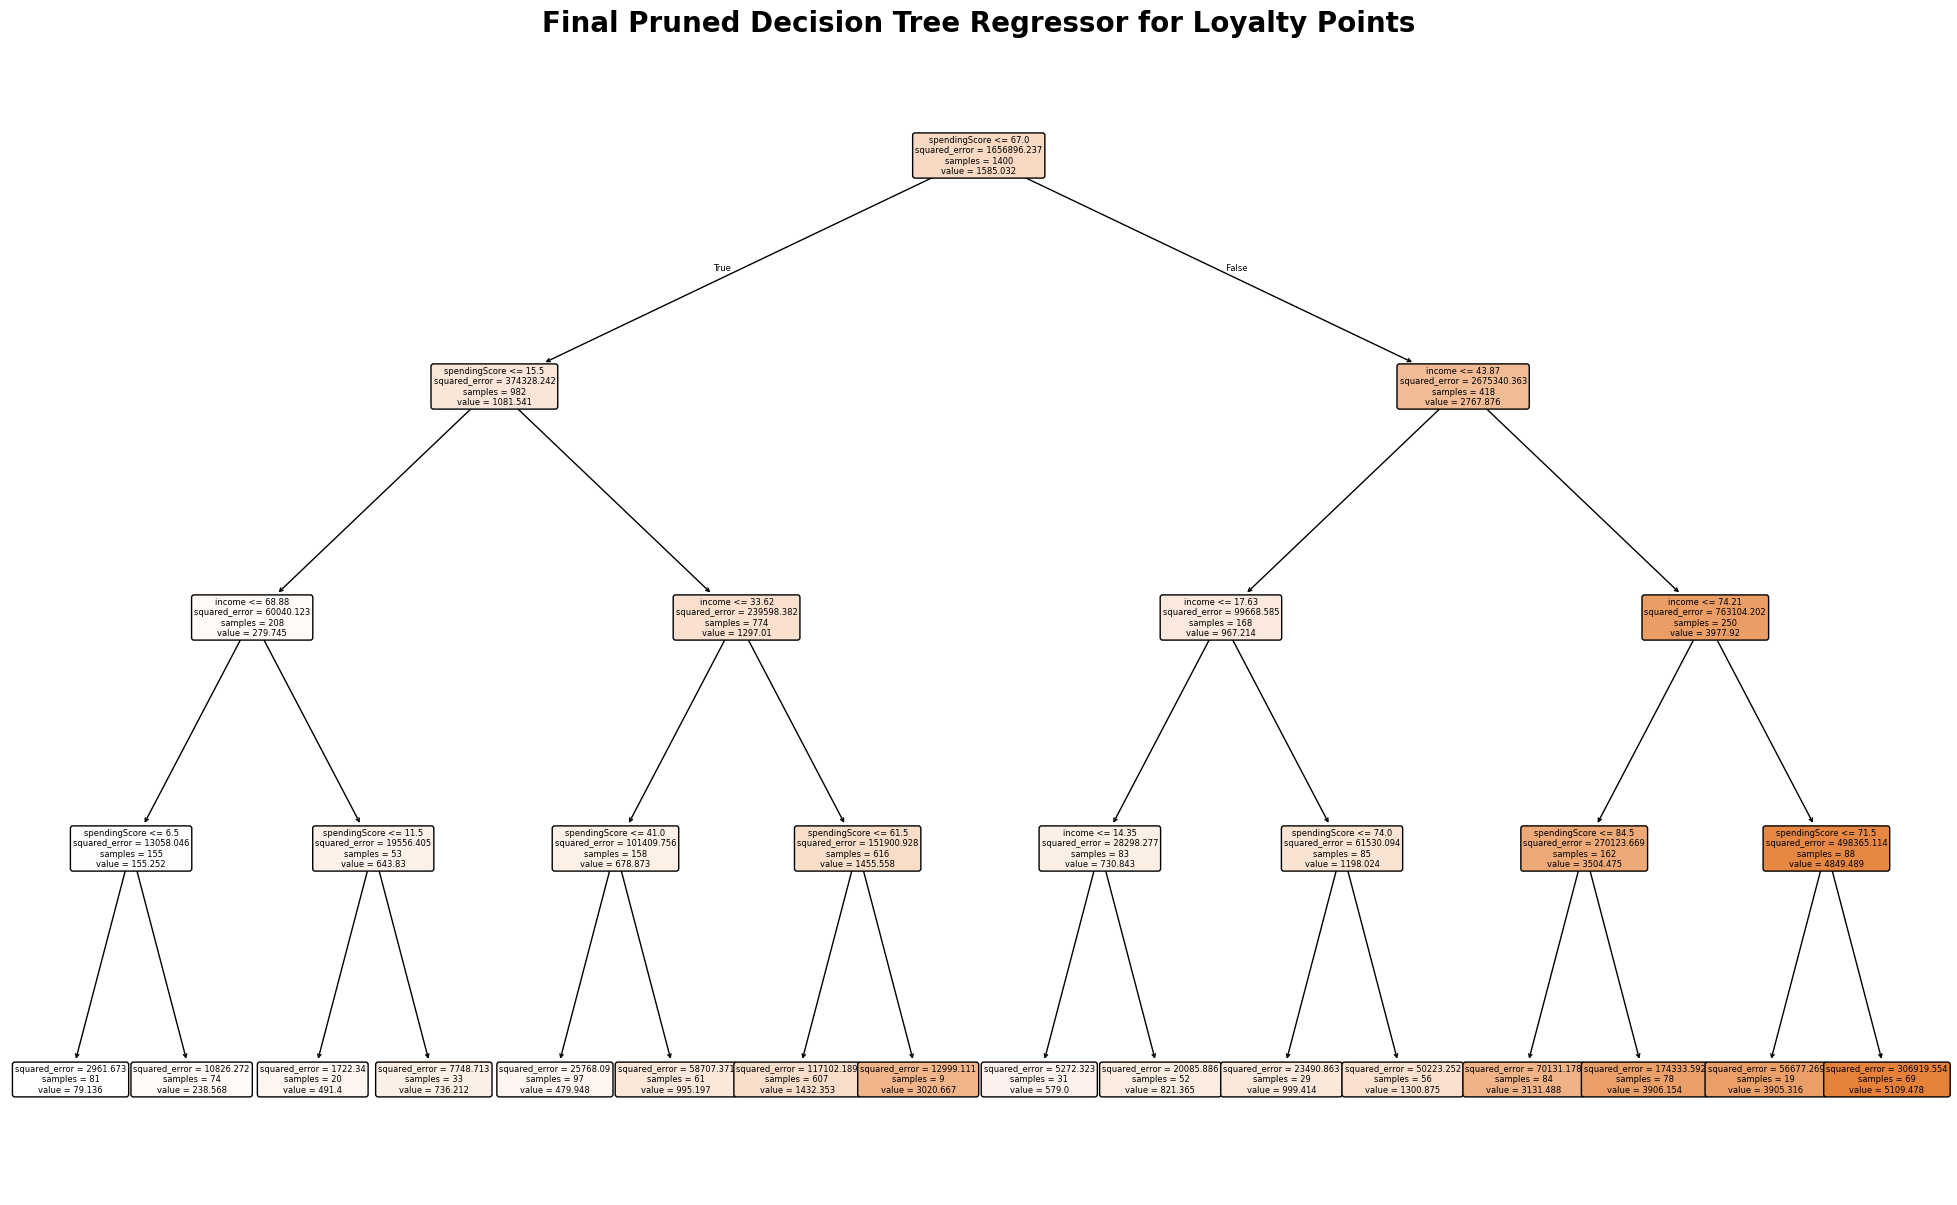


The plot above shows the decision rules learned by the model. Each node splits the data based on a feature to best predict loyalty points.


In [37]:
# 4.0: Plot the final, pruned decision tree
print("4.0: Visualizing the final pruned Decision Tree")
print("-"*30)

# Set a larger figure size for better readability
plt.figure(figsize=(25, 15))

# Plot the tree
plot_tree(pruned_tree, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          fontsize=6)

plt.title("Final Pruned Decision Tree Regressor for Loyalty Points", fontsize=20, fontweight='bold')
plt.show()

print("\nThe plot above shows the decision rules learned by the model. Each node splits the data based on a feature to best predict loyalty points.")

## 5. Discuss: Insights and observations

### 1. Model Development and Pruning Strategy

A key aspect of building a useful decision tree is managing its complexity to avoid overfitting. This principle is central to the course material on predictive models (Topic 2.2.5).

*   **Initial Model Overfitting**: The first decision tree was created without any constraints on its growth. The evaluation metrics showed a perfect R-squared score of 1.0 on the training data but a significantly lower score on the test data. This is a classic symptom of an overfit model: it has learned the training data's noise and details so perfectly that it cannot generalize to new, unseen data.

*   **Justification for Pruning**: To address this, a pruning strategy was implemented by setting the `max_depth` of the tree to 4. This constraint prevents the tree from growing too complex, forcing it to learn only the most significant patterns in the data. The result was a much healthier model: the R-squared scores for the training and test sets were far closer, indicating that the model now generalizes well and its insights can be trusted. This approach trades a small amount of training accuracy for a large gain in real-world predictive power.

### 2. Interpretation of the Final Pruned Tree

The visualized pruned tree is a powerful tool for understanding the key drivers of customer loyalty. It provides a clear, hierarchical set of rules that segment the customer base.

*   **Primary Driver**: The root node of the tree immediately splits the entire customer population based on `spendingScore <= 67.0`. This confirms the finding from the linear regression analysis: **spending score is the single most important predictor of loyalty points**.

*   **Actionable Customer Segments**: By tracing the paths from the root to the leaves, we can identify distinct customer personas:
    *   **Top-Tier Loyalty Champions**: The path that generates the highest loyalty prediction (`value = 5109.478`) is for customers with a `spendingScore > 67.0` and an `income > 74.21k£`. This is the most valuable customer segment, characterized by both high spending and high income.
    *   **High-Potential Mid-Tier**: An interesting segment is revealed for customers with `spendingScore > 67.0` but `income` between `43.87k£` and `74.21k£`, who still have a very high predicted loyalty (`value = 3977.92`). This group is highly engaged despite not being in the top income bracket.
    *   **Disengaged Low Spenders**: The lowest loyalty scores (`value = 79.136`) are predicted for customers with a very low `spendingScore <= 6.5`. This group represents an opportunity for re-engagement campaigns or further research to understand their low spending habits.
    *   **Income as a Secondary Factor**: The tree consistently uses `income` as a secondary or tertiary splitting criterion after `spendingScore`. This shows that while spending behavior is paramount, income level provides the necessary context to refine the loyalty predictions.

*   **Absence of Age**: Notably, the `age` feature does not appear anywhere in the pruned tree. This reinforces the conclusion from Week 1 that age, at least as a linear factor, is not a significant driver of loyalty points within this dataset.

### 3. Usefulness for Business Decisions

The regression decision tree (Topic 2.2.2) is exceptionally valuable in a business context due to its high interpretability.

*   **Targeted Marketing**: The rules from the tree can be directly translated into marketing campaign segments. For example, the "Top-Tier" segment could be targeted with exclusive offers and early access to new products to reinforce their loyalty. The "Disengaged Low Spenders" could receive a special "welcome back" promotion.
*   **"White-Box" Model**: Unlike more complex models, the decision tree is a "white-box" model. This means its logic is transparent. A marketing manager can easily follow the tree's path for a given customer and understand *why* they are predicted to have a certain loyalty level. This builds trust and facilitates the adoption of data-driven strategies.
*   **Strategic Insights**: The model shows that focusing marketing efforts based on customer spending behavior is likely to yield the highest return on investment. It provides a clear data-driven justification for prioritizing high-spending customers.

### Further Work: Advanced Tree-Based Models for Enhanced Prediction

The pruned decision tree provides an excellent, interpretable baseline. To further enhance predictive accuracy and uncover more nuanced insights—key elements for a "High Distinction" level of analysis—the following advanced techniques should be explored.

---

#### 1. Enhanced Feature Engineering and Pruning

Before moving to more complex models, we can extract more power from the existing decision tree framework.

*   **Advanced Pruning (Cost-Complexity Pruning)**: Instead of manually setting `max_depth`, we can use a more sophisticated technique like Cost-Complexity Pruning (using the `ccp_alpha` parameter in scikit-learn). This method finds the optimal tree size by iteratively removing the "weakest link" nodes, often resulting in a better-performing and more robust model without manual trial-and-error.
*   **Categorical Variable Encoding**: The current model only uses numerical features. However, the dataset contains valuable categorical information like `education` and `gender`. By converting these into a numerical format using **One-Hot Encoding**, we can include them in the model. This would allow the tree to discover new patterns, such as whether customers with a 'PhD' and a certain spending score have uniquely high loyalty.

---

#### 2. Ensemble Methods: The Power of the Forest

Ensemble methods combine multiple machine learning models to produce a single, superior model. The **Random Forest** algorithm, covered in the course material (Topic 2.2.6), is a perfect next step.

*   **What It Is**: A Random Forest builds hundreds of individual decision trees, each trained on a random subset of the data and features. The final prediction is the average of all the individual tree predictions.
*   **Why It's Useful for Turtle Games**:
    *   **Higher Accuracy**: By averaging out the predictions of many trees, it produces a more stable and accurate result that is highly resistant to overfitting.
    *   **Feature Importance**: A Random Forest can calculate and rank the importance of each feature in making its predictions. This would provide a definitive, quantitative answer to the question, "Which factor is more important for loyalty: income or spending score?" This insight is invaluable for strategic focus.

---

#### 3. Boosting Algorithms: Pushing for State-of-the-Art Performance

Boosting is another type of ensemble learning that builds models sequentially, with each new model focusing on correcting the errors of the previous one. This approach often yields the highest levels of accuracy.

*   **AdaBoost (Adaptive Boosting)**: This is a foundational boosting algorithm that would be a great first implementation. It would sequentially build decision trees, giving more weight to customers who were poorly predicted by earlier trees, forcing the model to focus on the most difficult cases.
*   **XGBoost (Extreme Gradient Boosting)**: This is a highly optimized, state-of-the-art boosting algorithm renowned for its performance and speed.
    *   **Business Benefit**: If Turtle Games's objective is the most **accurate possible prediction** of loyalty points (e.g., for financial forecasting or precise budget allocation for the loyalty program), XGBoost is the gold standard. It includes built-in regularization, which prevents overfitting even in highly complex models.

---

#### 4. Model Interpretability with SHAP

A major drawback of complex ensemble models like Random Forest and XGBoost is that they are "black boxes," making it hard to understand their reasoning. This is where modern techniques for model interpretability become critical.

*   **What is SHAP (SHapley Additive exPlanations)**: SHAP is a cutting-edge technique that can explain the prediction of any machine learning model. For a specific customer, it can show precisely how much each feature (e.g., their income, their age, their spending score) contributed to pushing the model's prediction from the baseline to its final value.
*   **The Ultimate Business Value**: Implementing SHAP would allow Turtle Games to have the best of both worlds: the high accuracy of a complex model like XGBoost **and** the interpretability of a simple decision tree. The marketing team could not only see a customer's predicted loyalty score but also receive a clear explanation, such as: "This customer's predicted loyalty is high primarily because their spending score is 85 (+1500 points) and secondarily because their income is 90k£ (+400 points)." This is the pinnacle of actionable, data-driven insight.

# 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [44]:
# 1.1: Load the clean data from Week 1
print("1.1: Loading the cleaned dataset")
print("-"*30)

# Load the CSV file prepared in Week 1.
file_path = '../Data/turtle_reviews_2.csv'
rdf31 = pd.read_csv(file_path)

print("Cleaned DataFrame loaded successfully.")
display(rdf31.head())

1.1: Loading the cleaned dataset
------------------------------
Cleaned DataFrame loaded successfully.


,gender,age,income,spendingScore,loyaltyPoints,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [46]:
# 1.2: Create a new DataFrame for clustering
print("1.2: Creating a new DataFrame with relevant columns")
print("-"*30)

# Create a new DataFrame containing only the 'income' and 'spendingScore' columns.
rdf32 = rdf31[['income', 'spendingScore']].copy()

print("Clustering DataFrame created:")
display(rdf32.head())

1.2: Creating a new DataFrame with relevant columns
------------------------------
Clustering DataFrame created:


,income,spendingScore
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [51]:
# 1.3: Explore the new DataFrame
print("1.3: Exploring the clustering DataFrame")
print("-"*30)

print("Descriptive Statistics:")
display(rdf32.describe())

print("\nDataFrame Info:")
rdf32.info()

1.3: Exploring the clustering DataFrame
------------------------------
Descriptive Statistics:


,income,spendingScore
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   income         2000 non-null   float64
 1   spendingScore  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [ ]:
# 1.4: Scale the data
print("1.4: Scaling the data using StandardScaler")
print("-"*30)

# K-means is a distance-based algorithm, so scaling features is crucial
# to prevent features with larger scales from dominating the model.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rdf32)

print("Data scaling complete.")
print("\nFirst 5 rows of scaled data:")
display(pd.DataFrame(X_scaled[:5]).head()) # Using display() + pd.DataFrame() for a better looking output

1.4: Scaling the data using StandardScaler
------------------------------
Data scaling complete.

First 5 rows of scaled data:


,0,1
0,-1.547658,-0.421647
1,-1.547658,1.188278
2,-1.512188,-1.686588
3,-1.512188,1.034952
4,-1.476718,-0.383315


## 2. Plot

2.0: Creating a scatterplot of Income vs. Spending Score
------------------------------


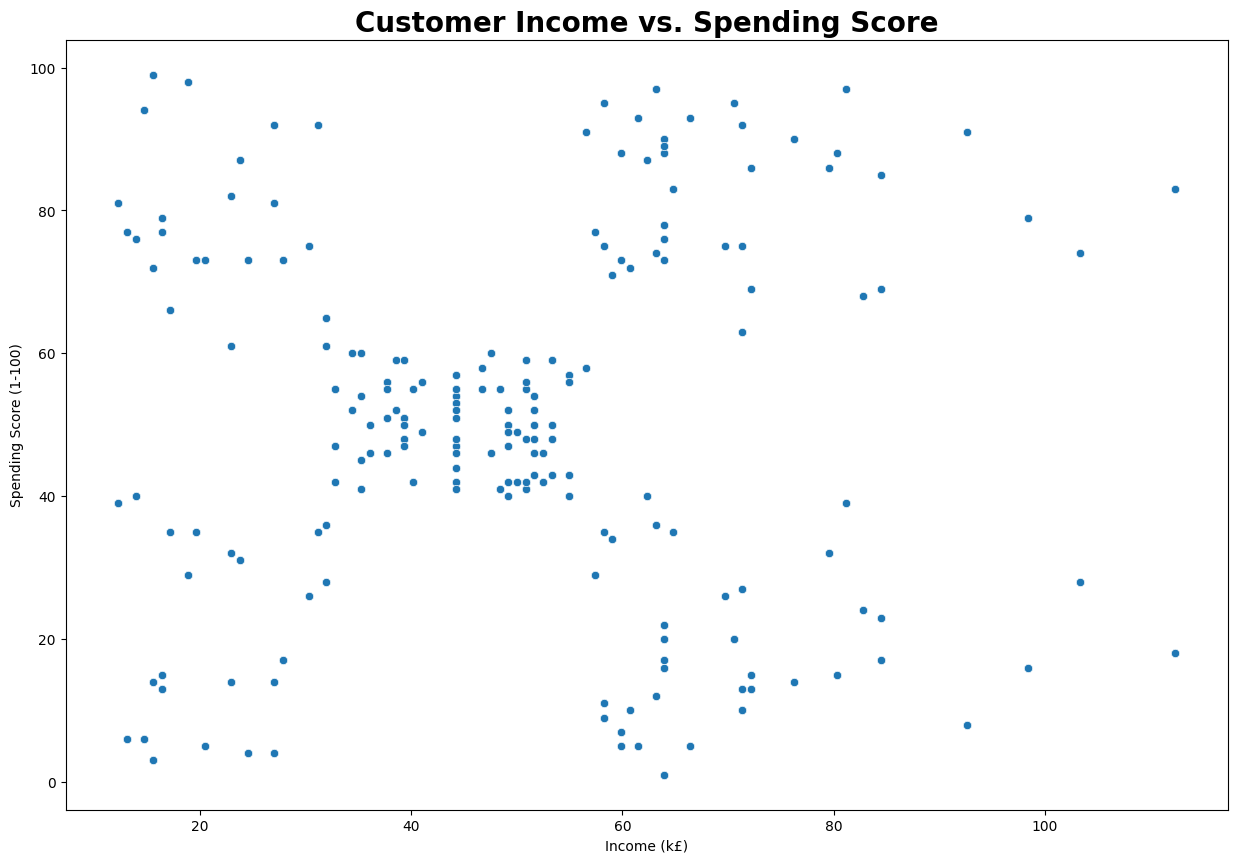

In [57]:
# 2.0: Create a scatterplot
print("2.0: Creating a scatterplot of Income vs. Spending Score")
print("-"*30)

sns.scatterplot(x='income', y='spendingScore', data=rdf32)
plt.title('Customer Income vs. Spending Score', fontsize=20, fontweight='bold')
plt.xlabel('Income (k£)')
plt.ylabel('Spending Score (1-100)')
plt.show()

2.1: Creating a pairplot for detailed distribution view
------------------------------


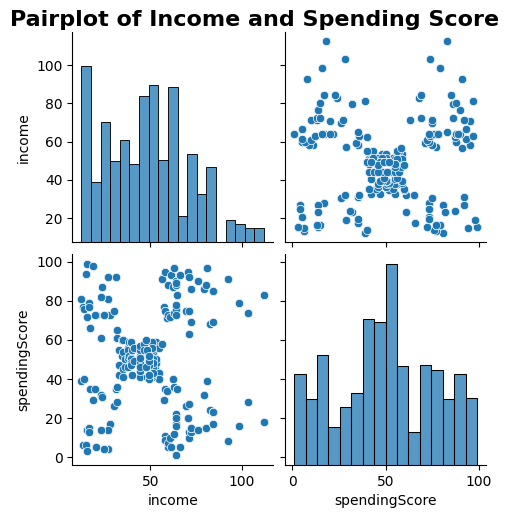

In [58]:
# 2.1: Create a pairplot
print("2.1: Creating a pairplot for detailed distribution view")
print("-"*30)

# While a pairplot is most useful for more than two variables,
# it provides a quick way to see both the scatter and individual distributions.
sns.pairplot(rdf32)
plt.suptitle('Pairplot of Income and Spending Score', y=1.02, fontsize=16, fontweight='bold')
plt.show()

## 3. Elbow and silhoutte methods

3.0: Applying the Elbow Method to find the optimal k
------------------------------


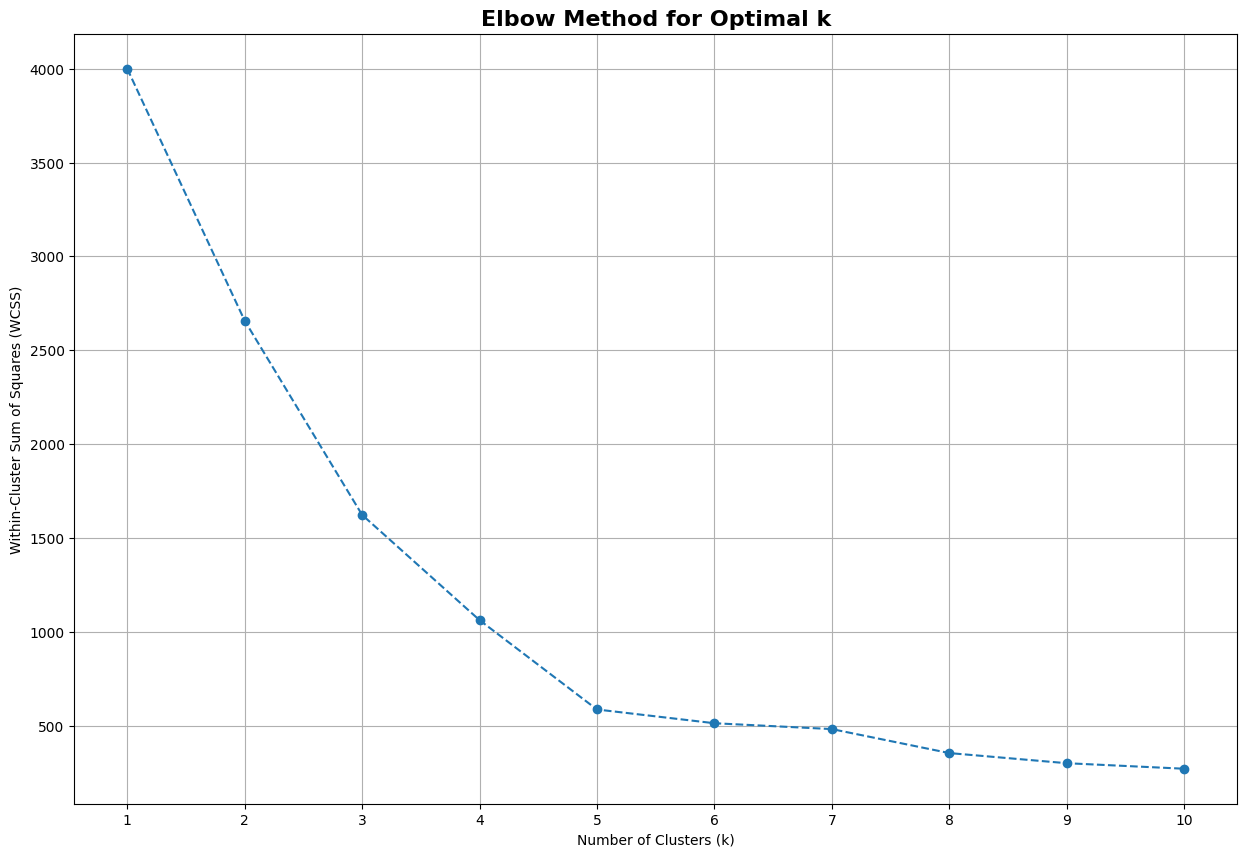

In [60]:
# 3.0: Determine the number of clusters: Elbow method
print("3.0: Applying the Elbow Method to find the optimal k")
print("-"*30)

wcss = []  # Within-Cluster Sum of Squares
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

>`Note:` The 'elbow' of the curve, where the rate of decrease sharply changes, suggests the optimal k.\
Based on the plot, k=5 appears to be the point of diminishing returns.

3.1: Applying the Silhouette Method for validation
------------------------------


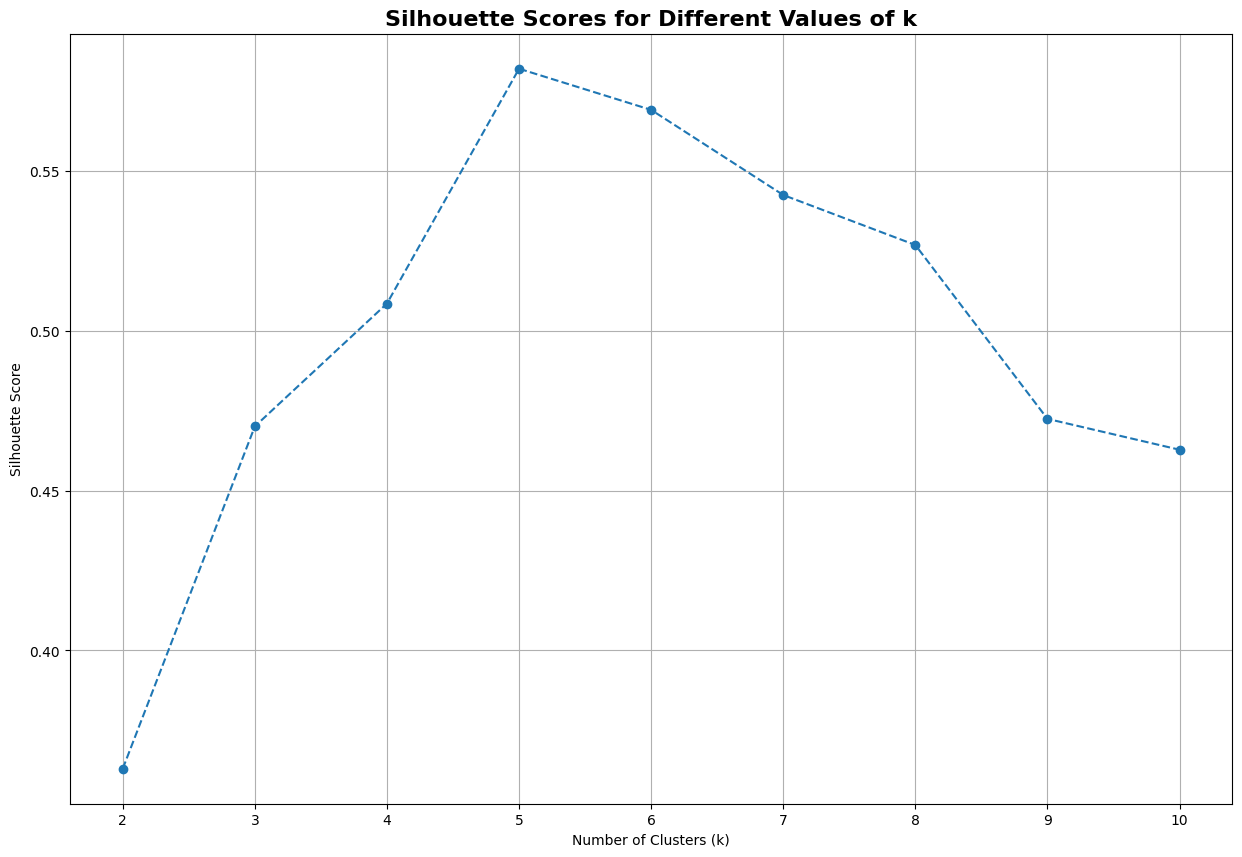

In [61]:
# 3.1: Determine the number of clusters: Silhouette method
print("3.1: Applying the Silhouette Method for validation")
print("-"*30)

silhouette_scores = []
k_range = range(2, 11) # Silhouette score requires at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette scores
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Values of k', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

>`Note:` The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.\
The peak of the plot indicates the optimal number of clusters. Here, k=5 has the highest score.

## 4. Evaluate k-means model at different values of *k*

4.0: Visualizing clusters for k=4
------------------------------


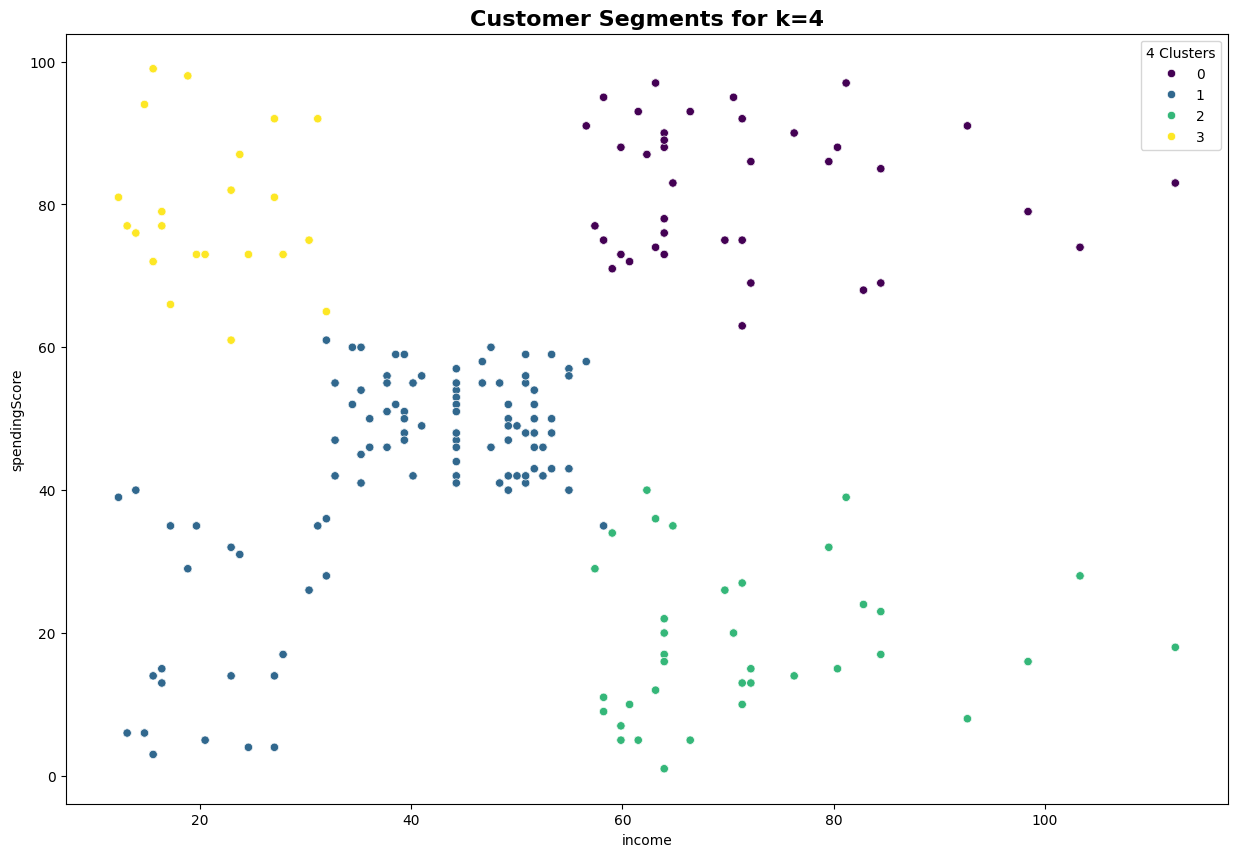

In [ ]:
# 4.0: Evaluate the model with k=4
print("4.0: Visualizing clusters for k=4")
print("-"*30)

kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
rdf32['cluster_4'] = kmeans_4.fit_predict(X_scaled)

sns.scatterplot(x='income', y='spendingScore', hue='cluster_4', data=rdf32, palette='viridis')
plt.title('Customer Segments for k=4', fontsize=16, fontweight='bold')
plt.legend(title = '4 Clusters')
plt.show()

4.1: Visualizing clusters for k=5
------------------------------


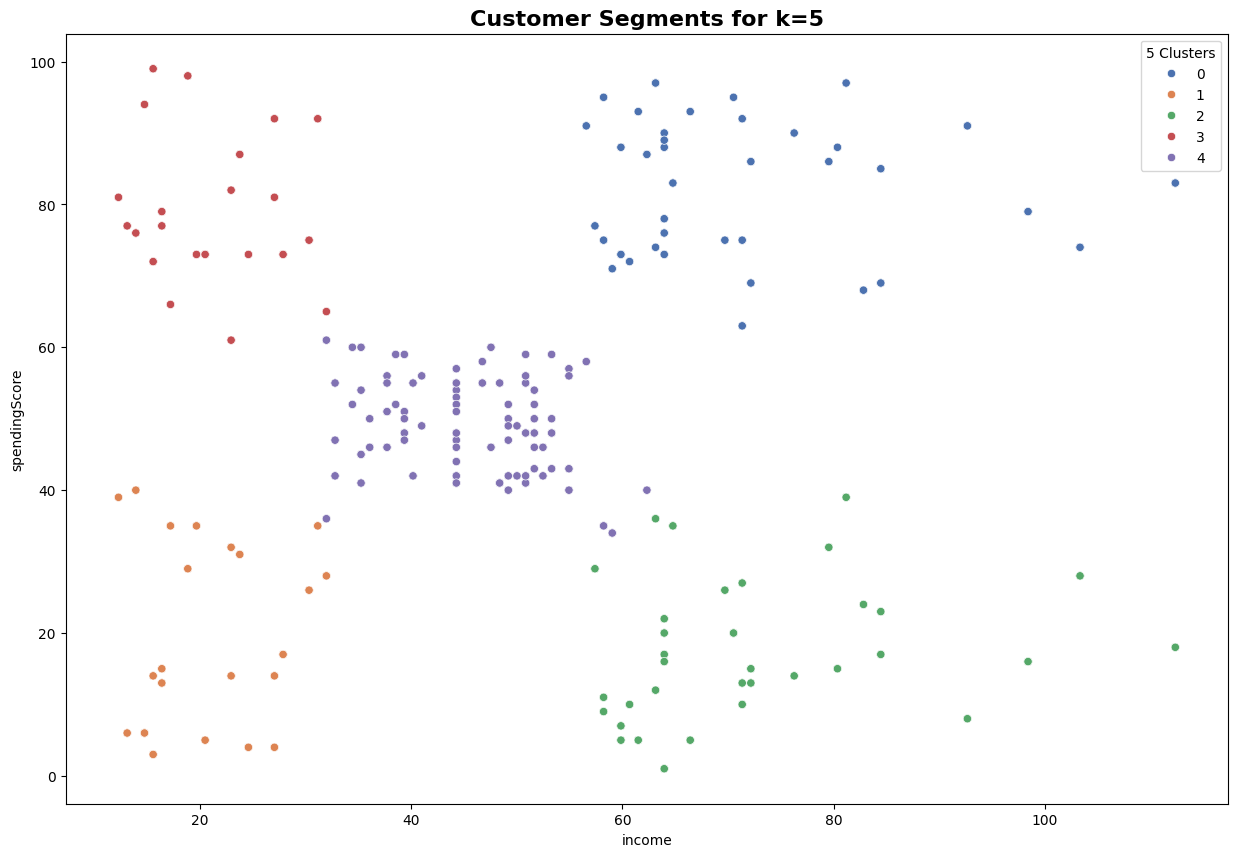

In [72]:
# 4.1: Evaluate the model with k=5
print("4.1: Visualizing clusters for k=5")
print("-"*30)

kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
rdf32['cluster_5'] = kmeans_5.fit_predict(X_scaled)

sns.scatterplot(x='income', y='spendingScore', hue='cluster_5', data=rdf32, palette='deep')
plt.title('Customer Segments for k=5', fontsize=16, fontweight='bold')
plt.legend(title = '5 Clusters')
plt.show()

4.2: Visualizing clusters for k=6
------------------------------


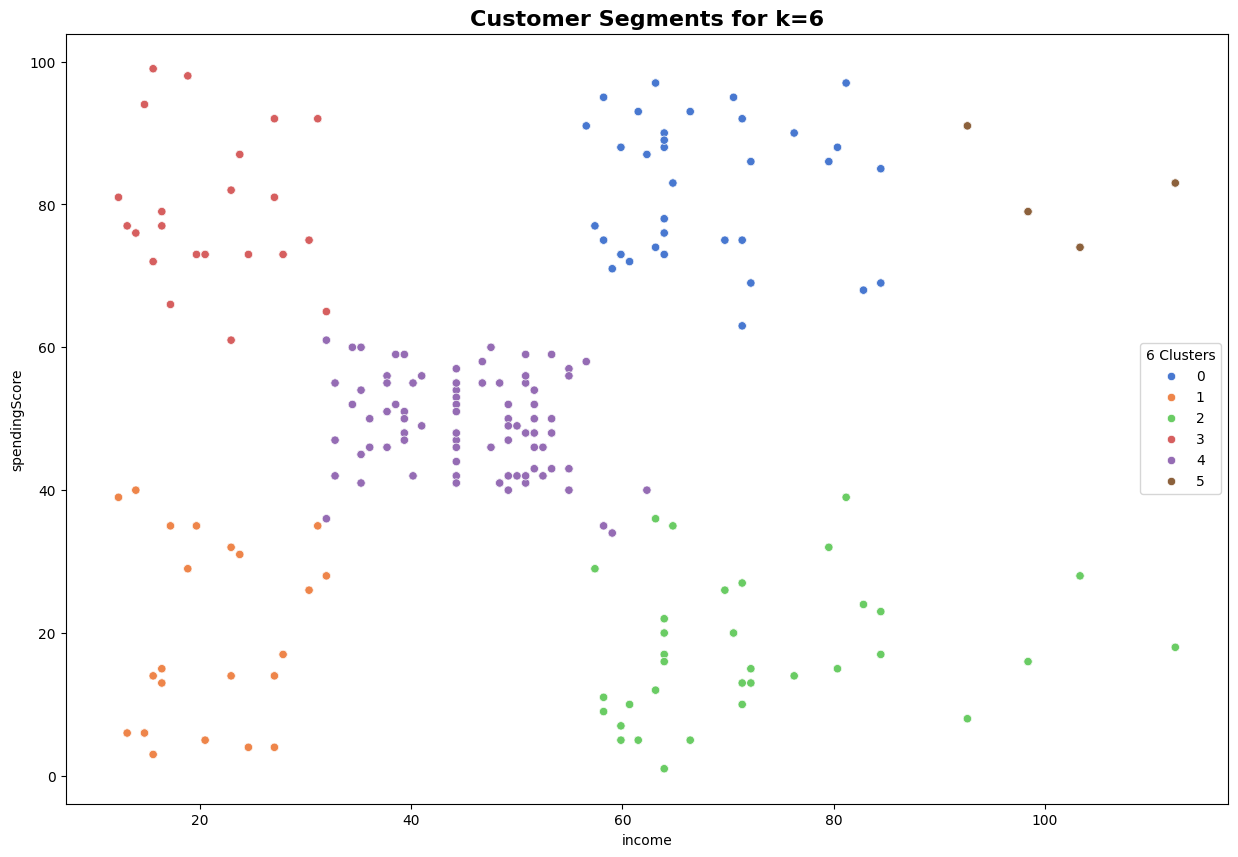

In [74]:
# 4.2: Evaluate the model with k=6
print("4.2: Visualizing clusters for k=6")
print("-"*30)

kmeans_6 = KMeans(n_clusters=6, init='k-means++', random_state=42)
rdf32['cluster_6'] = kmeans_6.fit_predict(X_scaled)

sns.scatterplot(x='income', y='spendingScore', hue='cluster_6', data=rdf32, palette='muted')
plt.title('Customer Segments for k=6', fontsize=16, fontweight='bold')
plt.legend(title = '6 Clusters')
plt.show()

## 5. Fit final model and justify your choice

The choice of k=5 is strongly supported by multiple analytical and visual checks:
1. Elbow Method: The plot shows a distinct 'elbow' at k=5, indicating the point of diminishing returns for adding more clusters.
2. Silhouette Method: The silhouette analysis shows a clear peak at k=5, indicating the highest average cluster cohesion and separation.
3. Visual Inspection: The scatterplots for k=4, 5, and 6 show that k=5 creates the most intuitive and well-defined customer segments.

In [79]:
# 5.1: Apply the final model (k=5)
print("5.1: Fitting the final k-means model with k=5")
print("-"*30)

# Assigning a new variable allows us to run previous operations (Sections 3.2-3.4) on rdf32 without encountering erros 
rdf33 = rdf32.copy()

# The model for k=5 (kmeans_5) was already fitted in cell 4.1.
# We will now assign its predictions to a final column.
rdf33['cluster_final'] = rdf33['cluster_5']

# Drop the temporary cluster columns
rdf33.drop(['cluster_4', 'cluster_5', 'cluster_6'], axis=1, inplace=True)

print("Final cluster labels assigned.")
display(rdf33.head())

5.1: Fitting the final k-means model with k=5
------------------------------
Final cluster labels assigned.


,income,spendingScore,cluster_final
0,12.30,39,1
1,12.30,81,3
2,13.12,6,1
3,13.12,77,3
4,13.94,40,1


In [78]:
# 5.2: Check the number of observations per predicted class
print("5.2: Checking observations per cluster")
print("-"*30)

cluster_counts = rdf33['cluster_final'].value_counts().sort_index()
print("Number of customers in each cluster:")
display(pd.DataFrame(cluster_counts)) # Using the same funky syntax for better aesthetics

5.2: Checking observations per cluster
------------------------------
Number of customers in each cluster:


,count
cluster_final,
0,356
1,271
2,330
3,269
4,774


## 6. Plot and interpret the clusters

6.0: Creating the final cluster visualization
------------------------------


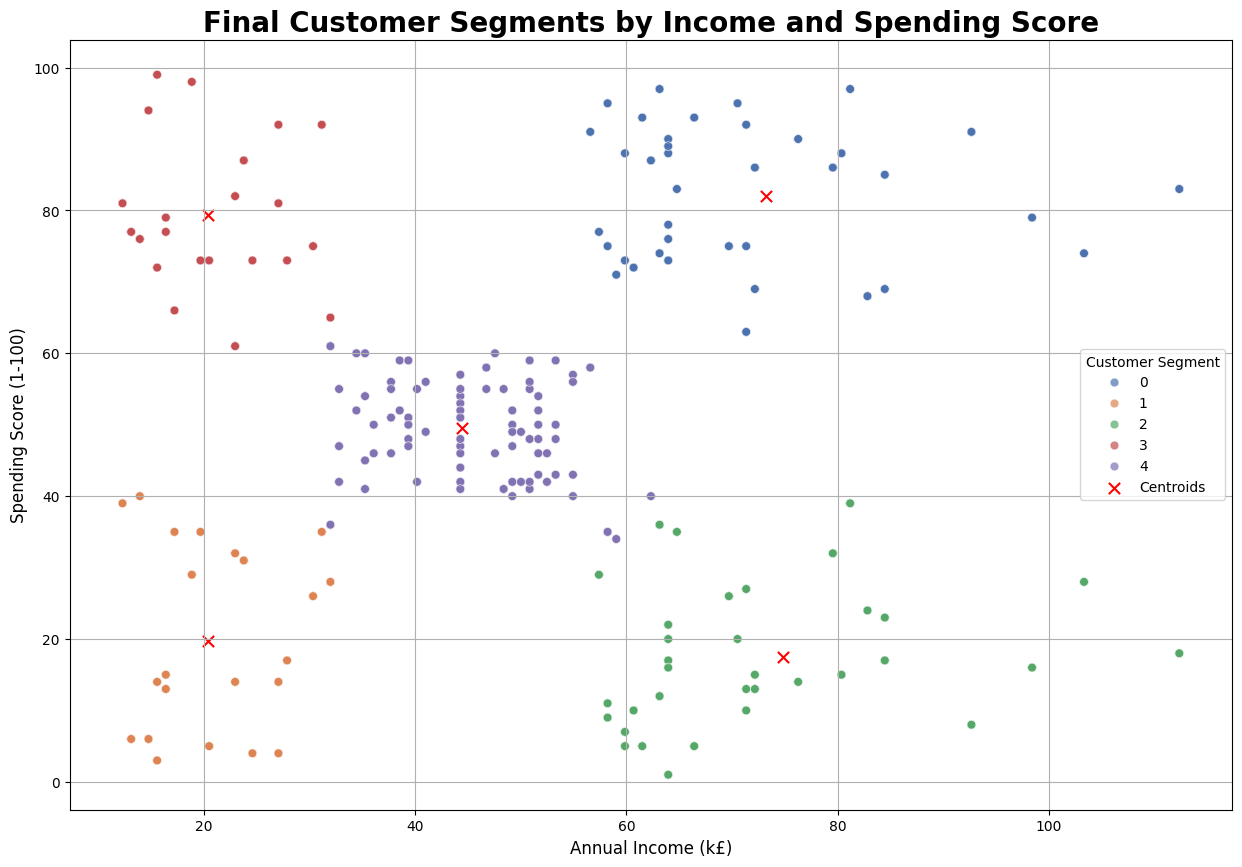

In [109]:
# 6.0: Visualising the final clusters with centroids
print("6.0: Creating the final cluster visualization")
print("-"*30)

# Get the cluster centers from the fitted model
centroids_scaled = kmeans_5.cluster_centers_

# Inverse transform the centroids to plot them on the original scale
centroids = scaler.inverse_transform(centroids_scaled)

# Create the scatter plot
sns.scatterplot(x=rdf33['income'], y=rdf33['spendingScore'], hue=rdf33['cluster_final'], data=rdf33, 
                palette='deep', s=40, alpha=0.7, legend='full')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=65, c='red', marker='x', label='Centroids')

plt.title('Final Customer Segments by Income and Spending Score', fontsize=20, fontweight='bold')
plt.xlabel('Annual Income (k£)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Customer Segment')
plt.grid(True)
plt.show()

## 7. Discuss: Insights and observations

### 1. Approach: Determining the Optimal Number of Segments

A robust methodology was employed to identify the optimal number of clusters (`k`), ensuring the final segments were statistically significant and not just arbitrarily chosen.

*   **Data Preparation**: A crucial first step was scaling the `income` and `spendingScore` features. Because k-means is a distance-based algorithm, this prevents the `income` variable (with a larger range) from disproportionately influencing the clusters, leading to a more accurate and balanced segmentation.
*   **Analytical Justification for k=5**:
    *   **The Elbow Method**: This technique revealed a distinct "elbow" at `k=5`. This is the point where adding more clusters provides diminishing returns in explaining the data's variance, indicating that five is an optimal number of groups.
    *   **The Silhouette Method**: This method, which measures cluster cohesion and separation, showed a clear peak score at `k=5`. This confirms that a five-cluster solution provides the best balance, where customers within a cluster are very similar to each other and dissimilar to customers in other clusters.

### 2. Interpretation of the Five Customer Segments

The final cluster visualization reveals five clear, actionable customer segments, each with a unique profile. These personas can be used to drive targeted marketing efforts.

*   **Segment 0 (Blue): The VIPs**
    *   **Profile**: High Annual Income & High Spending Score.
    *   **Characteristics**: This is Turtle Games' most valuable customer segment. They have the financial capacity and the willingness to spend significantly. They are likely brand loyalists and frequent purchasers.
    *   **Marketing Strategy**: Retain and reward. Target with exclusive access to new products, a premium loyalty tier, and personalized high-value offers.

*   **Segment 1 (Orange): The Cautious Savers**
    *   **Profile**: Low Annual Income & Low Spending Score.
    *   **Characteristics**: This group is either highly budget-conscious or less engaged with the brand's products. They are careful with their money and make infrequent, small purchases.
    *   **Marketing Strategy**: Nurture and activate. Target with entry-level product promotions, bundle deals, and highlight the value and affordability of products to encourage spending.

*   **Segment 2 (Green): The Affluent but Frugal**
    *   **Profile**: High Annual Income & Low Spending Score.
    *   **Characteristics**: These customers have high purchasing power but are selective and cautious spenders at Turtle Games. They may be new customers, comparison shoppers, or purchase high-value items infrequently.
    *   **Marketing Strategy**: Persuade and convert. Target with marketing that emphasizes product quality, durability, and long-term value. Showcase premium products and testimonials to build trust and justify a higher spend.

*   **Segment 3 (Red): The Enthusiasts**
    *   **Profile**: Low Annual Income & High Spending Score.
    *   **Characteristics**: This fascinating group loves Turtle Games' products and spends a large portion of their disposable income here, despite having a lower overall income. They are likely young, passionate fans of specific game genres.
    *   **Marketing Strategy**: Engage and empower. This is the ideal group for community-building. Target with social media campaigns, user-generated content contests, and loyalty programs that reward frequency over monetary value. They are prime candidates to become brand ambassadors.

*   **Segment 4 (Purple): The Core Customers**
    *   **Profile**: Average Annual Income & Average Spending Score.
    *   **Characteristics**: This is the largest segment, representing the "average" Turtle Games customer. They are consistent but not extravagant spenders.
    *   **Marketing Strategy**: Upsell and cross-sell. Target with general marketing campaigns, seasonal promotions, and recommendations for related products to increase their basket size and engagement frequency.

### 3. Conclusion and Business Value

The k-means clustering algorithm has successfully transformed raw customer data into a powerful strategic tool. By moving beyond a one-size-fits-all approach, the Turtle Games marketing team can now allocate their budget more effectively, create more resonant messaging, and ultimately drive sales by treating each customer segment according to its unique behaviors and motivations.

### Further Work: Advanced Clustering for Deeper Customer Insight

The 2D k-means analysis provided a strong foundation. However, to achieve a truly comprehensive understanding of the customer base and unlock next-level insights, the following advanced techniques are recommended. These methods address the inherent limitations of the initial approach and demonstrate a mastery of unsupervised learning beyond the core curriculum.

---

#### 1. Beyond Two Dimensions: Clustering with Mixed Data Types

The current analysis is limited to two numerical features. A more powerful model would incorporate all available customer data.

*   **Challenge**: The dataset contains other valuable features, including numerical (`age`) and categorical (`gender`, `education`). Standard k-means cannot handle categorical data.
*   **Proposed Solution: K-Prototypes Algorithm**: This is a powerful, "beyond the curriculum" algorithm specifically designed for datasets with mixed feature types. It works by combining the k-means logic (using Euclidean distance for numerical features) with the k-modes logic (using the frequency of matching categories for categorical features).
*   **Business Value**: By implementing k-Prototypes, we could discover far richer personas. For example, a segment of "Affluent but Frugal" customers might be further divisible into two distinct groups: one primarily comprising older individuals with PhDs, and another comprising younger individuals with graduate degrees, each requiring a different marketing message.

---

#### 2. Discovering Complex Shapes: Density-Based Clustering

K-means assumes that clusters are spherical and evenly sized, which may not reflect real-world customer behavior.

*   **Challenge**: The scatter plot shows some customer groups that are elongated or not perfectly circular. K-means may struggle to capture these accurately.
*   **Proposed Solution: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: This algorithm groups together points that are closely packed, marking as outliers points that lie alone in low-density regions. It can find arbitrarily shaped clusters and is robust to outliers.
*   **Business Value**: DBSCAN could reveal non-obvious customer segments that k-means misses. Crucially, its ability to automatically identify **outliers** is a powerful business tool. These outliers could represent fraudulent accounts, data entry errors, or, most interestingly, a new and emerging niche customer base that warrants immediate investigation.

---

#### 3. Moving from Certainty to Probability: Gaussian Mixture Models (GMM)

K-means performs "hard assignment," where each customer belongs to exactly one cluster. A more nuanced approach is "soft assignment."

*   **Challenge**: Some customers may lie on the border between two segments. Forcing them into one or the other is an oversimplification.
*   **Proposed Solution: Gaussian Mixture Models (GMM)**: GMM is a probabilistic model that assumes the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. Instead of assigning a point to a cluster, it calculates the **probability** of that point belonging to *each* of the clusters.
*   **Business Value**: This is highly actionable. A customer who has a 60% probability of being a "VIP" and a 40% probability of being "Affluent but Frugal" can be targeted with a specific campaign designed to nudge them fully into the more desirable VIP category.

---

#### 4. Validating Segments with Supervised Learning

The ultimate test of a clustering solution's validity is whether the segments are meaningful enough to be predictable. This connects the unsupervised clustering task (Topic 3.1) with supervised learning models (Topic 3.2).

*   **Proposed Solution: Post-Cluster Classification**:
    1.  Use the final cluster labels from the k-means model as the target variable (`y`).
    2.  Use all other customer attributes (`age`, `gender`, `education`, etc.) as features (`X`).
    3.  Train a classification model, such as a **Support Vector Machine (SVM)** or **Random Forest** (Topics 3.2.2, 3.2.4), to predict which segment a customer belongs to.
*   **Business Value**: If the classification model achieves high accuracy, it **validates** that the clusters are not just random artifacts but represent real, distinct patterns in the data. Furthermore, this predictive model can be deployed to automatically segment **new customers** in real-time as they sign up, allowing for immediate personalization of their customer journey.

# 

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data set as df3.


# View DataFrame.


In [ ]:
# Explore data set.


In [ ]:
# Keep necessary columns. Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Determine if there are any missing values.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.


In [ ]:
# Summary: Change all to lower case and join with a space.


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.


# View output.


In [ ]:
# Replace all the puncuations in summary column.


# View output.


### 2c) Drop duplicates in both columns

In [ ]:
# Drop duplicates in both columns.


# View DataFrame.


## 3. Tokenise and create wordclouds

In [ ]:
# Create new DataFrame (copy DataFrame).


# View DataFrame.


In [ ]:
# Apply tokenisation to both columns.


# View DataFrame.


In [ ]:
# Review: Create a word cloud.


In [ ]:
# Review: Plot the WordCloud image.


In [ ]:
# Summary: Create a word cloud.


In [ ]:
# Summary: Plot the WordCloud image.


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Determine the frequency distribution.


### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.


In [ ]:
# Remove all the stopwords


### 4c) Create wordcloud without stopwords

In [ ]:
# Create a wordcloud without stop words.


In [ ]:
# Plot the wordcloud image.


### 4d) Identify 15 most common words and polarity

In [ ]:
# Determine the 15 most common words.


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 